# NYC Taxi Fare Prediction
### GROUP-11
### Kevin Kurias Saibu
### Saujanya Sanjay Zemse

## Exploratory data analysis and preprocessing

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
taxi_df=pd.read_csv('train.csv')

In [ ]:
#Sampling the data 
taxi_fare=taxi_df.sample(frac=0.1,random_state=19)

In [ ]:
taxi_fare.to_csv('sampled_data.csv',index=False)

In [4]:
taxi_fare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 12:12:23 UTC,-73.971863,40.760189,-73.955239,40.782976,1
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 14:08:36 UTC,-73.969345,40.749676,-73.950876,40.770764,1
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 21:04:00 UTC,-73.945297,40.775255,-73.959260,40.768440,5
3,2009-09-19 00:12:00.00000065,13.7,2009-09-19 00:12:00 UTC,0.000000,0.000000,0.000000,0.000000,5
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 10:22:09 UTC,-73.985811,40.717965,-73.979805,40.748685,1


## Data cleaning and preprocessing

In [5]:
taxi_fare.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    34
dropoff_latitude     34
passenger_count       0
dtype: int64

In [6]:
taxi_fare.shape

(5542386, 8)

In [7]:
taxi_fare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 12:12:23 UTC,-73.971863,40.760189,-73.955239,40.782976,1
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 14:08:36 UTC,-73.969345,40.749676,-73.950876,40.770764,1
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 21:04:00 UTC,-73.945297,40.775255,-73.959260,40.768440,5
3,2009-09-19 00:12:00.00000065,13.7,2009-09-19 00:12:00 UTC,0.000000,0.000000,0.000000,0.000000,5
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 10:22:09 UTC,-73.985811,40.717965,-73.979805,40.748685,1


In [8]:
import datetime

#### Changing the 'datetime' variable's datatype to datetime 

In [9]:
pd.to_datetime(taxi_fare['pickup_datetime'])

0         2011-11-21 12:12:23+00:00
1         2012-02-09 14:08:36+00:00
2         2012-12-30 21:04:00+00:00
3         2009-09-19 00:12:00+00:00
4         2010-05-03 10:22:09+00:00
                     ...           
5542381   2011-04-29 03:34:14+00:00
5542382   2014-06-01 23:19:00+00:00
5542383   2011-05-11 19:41:00+00:00
5542384   2011-06-07 18:43:00+00:00
5542385   2012-10-01 16:56:00+00:00
Name: pickup_datetime, Length: 5542386, dtype: datetime64[ns, UTC]

#### Converting the UTC timezone to EST by shifting backwards by 4 hours

In [10]:
taxi_fare['pickup_datetime']=pd.to_datetime(taxi_fare['pickup_datetime'])-datetime.timedelta(hours=4)

In [11]:
taxi_fare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 08:12:23+00:00,-73.971863,40.760189,-73.955239,40.782976,1
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 10:08:36+00:00,-73.969345,40.749676,-73.950876,40.770764,1
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 17:04:00+00:00,-73.945297,40.775255,-73.959260,40.768440,5
3,2009-09-19 00:12:00.00000065,13.7,2009-09-18 20:12:00+00:00,0.000000,0.000000,0.000000,0.000000,5
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 06:22:09+00:00,-73.985811,40.717965,-73.979805,40.748685,1


#### Extracting year,month,day,weekday,hours,minutes from the datetime variable for further analysis

In [12]:
taxi_fare['year']=taxi_fare['pickup_datetime'].dt.year
taxi_fare['month']=taxi_fare['pickup_datetime'].dt.month
taxi_fare['day']=taxi_fare['pickup_datetime'].dt.day
taxi_fare['hour']=taxi_fare['pickup_datetime'].dt.hour
taxi_fare['minute']=taxi_fare['pickup_datetime'].dt.minute
taxi_fare['weekday']=taxi_fare['pickup_datetime'].dt.weekday

In [13]:
taxi_fare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 08:12:23+00:00,-73.971863,40.760189,-73.955239,40.782976,1,2011,11,21,8,12,0
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 10:08:36+00:00,-73.969345,40.749676,-73.950876,40.770764,1,2012,2,9,10,8,3
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 17:04:00+00:00,-73.945297,40.775255,-73.959260,40.768440,5,2012,12,30,17,4,6
3,2009-09-19 00:12:00.00000065,13.7,2009-09-18 20:12:00+00:00,0.000000,0.000000,0.000000,0.000000,5,2009,9,18,20,12,4
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 06:22:09+00:00,-73.985811,40.717965,-73.979805,40.748685,1,2010,5,3,6,22,0


In [14]:
taxi_fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday
count,5.542386e+06,5.542386e+06,5.542386e+06,5.542352e+06,5.542352e+06,5.542386e+06,5.542386e+06,5.542386e+06,5.542386e+06,5.542386e+06,5.542386e+06,5.542386e+06
mean,1.135938e+01,-7.250369e+01,3.991825e+01,-7.250622e+01,3.992103e+01,1.685602e+00,2.011737e+03,6.268715e+00,1.572539e+01,1.207144e+01,2.958553e+01,2.987577e+00
std,4.112289e+01,1.220157e+01,8.830634e+00,1.186357e+01,8.674950e+00,1.339037e+00,1.859832e+00,3.435876e+00,8.680526e+00,5.830325e+00,1.732761e+01,1.906964e+00
min,-1.000000e+02,-3.384713e+03,-3.432139e+03,-3.367929e+03,-3.147510e+03,0.000000e+00,2.008000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399140e+01,4.073401e+01,1.000000e+00,2.010000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.500000e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398014e+01,4.075315e+01,1.000000e+00,2.012000e+03,6.000000e+00,1.600000e+01,1.300000e+01,3.000000e+01,3.000000e+00
75%,1.250000e+01,-7.396706e+01,4.076712e+01,-7.396368e+01,4.076810e+01,2.000000e+00,2.013000e+03,9.000000e+00,2.300000e+01,1.700000e+01,4.500000e+01,5.000000e+00
max,9.396336e+04,3.438031e+03,3.347259e+03,3.411464e+03,3.537133e+03,2.080000e+02,2.015000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00


 #### Cleaning and filtering the data by removing the outliers. According to NYC state rule a cab cannot accomodate more than 8 passengers. 


In [15]:
def get_cleaned(df):
    return df[(df.fare_amount > 0) & (df.fare_amount<30) & (df.year>2008) &
              (df.pickup_latitude > 35) & (df.pickup_latitude < 45) &
              (df.pickup_longitude > -80) & (df.pickup_longitude < -68) &
              (df.dropoff_latitude > 35) & (df.dropoff_latitude < 45) &
              (df.pickup_longitude > -80) & (df.dropoff_longitude < -68) &
              (df.passenger_count > 0) & (df.passenger_count < 8)]


In [16]:
taxifare_cleaned=get_cleaned(taxi_fare)

In [17]:
taxifare_cleaned.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday
count,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06,5.130642e+06
mean,9.554162e+00,-7.397884e+01,4.075207e+01,-7.398257e+01,4.075228e+01,1.688199e+00,2.011709e+03,6.260606e+00,1.571853e+01,1.211991e+01,2.960629e+01,2.989967e+00
std,5.163524e+00,3.606788e-02,3.255437e-02,1.996549e+00,3.466233e-02,1.305497e+00,1.862204e+00,3.438556e+00,8.681470e+00,5.829116e+00,1.732695e+01,1.904041e+00
min,1.000000e-02,-7.976667e+01,3.504246e+01,-1.404460e+03,3.518952e+01,1.000000e+00,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399254e+01,4.073717e+01,-7.399174e+01,4.073661e+01,1.000000e+00,2.010000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.500000e+01,1.000000e+00
50%,8.100000e+00,-7.398235e+01,4.075343e+01,-7.398098e+01,4.075400e+01,1.000000e+00,2.012000e+03,6.000000e+00,1.600000e+01,1.300000e+01,3.000000e+01,3.000000e+00
75%,1.170000e+01,-7.396967e+01,4.076726e+01,-7.396682e+01,4.076833e+01,2.000000e+00,2.013000e+03,9.000000e+00,2.300000e+01,1.700000e+01,4.500000e+01,5.000000e+00
max,2.997000e+01,-6.803000e+01,4.498333e+01,-6.803000e+01,4.493188e+01,7.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00


#### Calculating the distance between pickup and dropoff locations by calculating the haversine distance between pickup and dropoff cordinates. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. 

In [18]:
def haversinedistance(df):
   
    latitude1= np.radians(df["pickup_latitude"])
    latitude2 = np.radians(df["dropoff_latitude"])
   
    dlatitude = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlongitude = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlatitude/2)**2 + np.cos(latitude1) * np.cos(latitude2) * np.sin(dlongitude/2)**2

    b = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 3956 #radius of earth inn miles
    return b * r

In [19]:
taxifare_cleaned['total_distance']=haversinedistance(taxifare_cleaned)

C:\Users\KEVIN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
taxifare_cleaned.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday,total_distance
0,2011-11-21 12:12:23.0000001,7.3,2011-11-21 08:12:23+00:00,-73.971863,40.760189,-73.955239,40.782976,1,2011,11,21,8,12,0,1.797494
1,2012-02-09 14:08:36.0000001,6.5,2012-02-09 10:08:36+00:00,-73.969345,40.749676,-73.950876,40.770764,1,2012,2,9,10,8,3,1.747274
2,2012-12-30 21:04:00.000000163,6.5,2012-12-30 17:04:00+00:00,-73.945297,40.775255,-73.959260,40.768440,5,2012,12,30,17,4,6,0.868605
4,2010-05-03 10:22:09.0000004,9.7,2010-05-03 06:22:09+00:00,-73.985811,40.717965,-73.979805,40.748685,1,2010,5,3,6,22,0,2.144219
5,2013-10-13 02:39:00.000000180,6.5,2013-10-12 22:39:00+00:00,-73.990437,40.755912,-73.972912,40.750320,1,2013,10,12,22,39,5,0.994622


In [21]:
taxifare_cleaned=taxifare_cleaned[taxifare_cleaned.total_distance<50]

In [22]:
taxifare_cleaned.shape

(5129135, 15)

### Analysis using data visualization

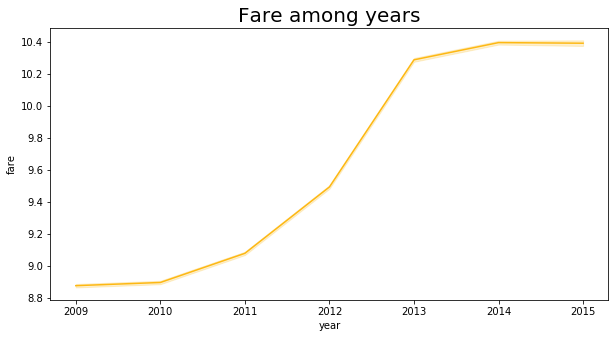

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(x="year", y="fare_amount", data=taxifare_cleaned, color="#fdb813")
plt.title("Fare among years",fontsize=20)
plt.ylabel('fare')
plt.show()


#### The fare appears to be increasing over the years. There is a sudden increase in the price after 2012, this might be because of the sudden price hike in petrol and diesel happened during 2012.

Text(0.5, 1.0, 'Count of number of passengers')

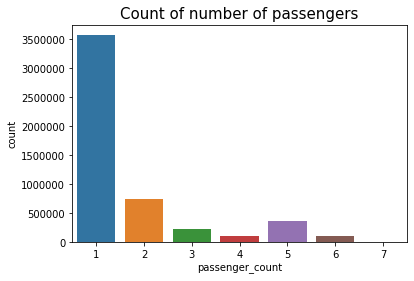

In [24]:
sns.countplot(x='passenger_count',data=taxifare_cleaned)
plt.title('Count of number of passengers',fontsize=15)

#### It can be seen that majority of the taxi rides contains only single passengers.

Text(0.5, 1.0, 'Frequency of tax rides for each hour in a day')

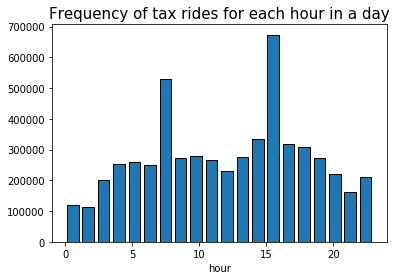

In [25]:

sns.distplot(taxi_fare['hour'],bins=20,kde=False,  hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
plt.title('Frequency of tax rides for each hour in a day',fontsize=15)

#### We can see that majority of taxi rides happen during morning and afternoon. This might be because of most of the working professionals who hires their cab during the morning and evening time.

Text(0.5, 1.0, 'Distribution of fare for each hour in a day')

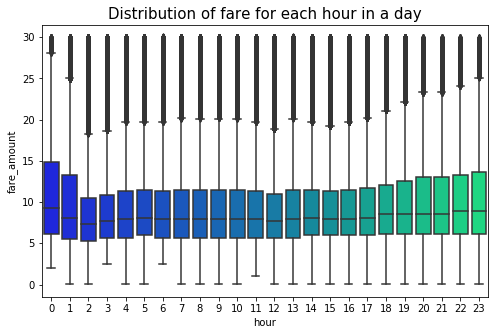

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hour',y='fare_amount',data=taxifare_cleaned,palette='winter')
plt.title('Distribution of fare for each hour in a day',fontsize=15)

#### It can be inferred from the side by side boxplots that the fare is considerably high during midnight and after 6pm.

Text(0.5, 1.0, 'Distribution of fare for different passenger count')

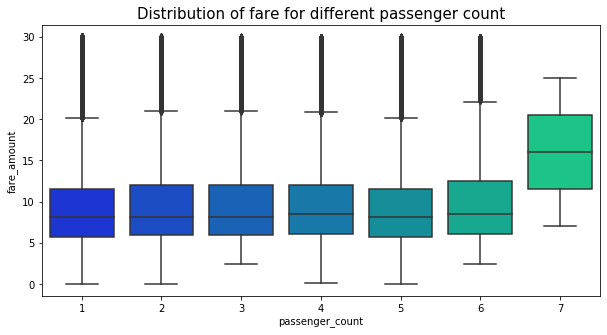

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='passenger_count',y='fare_amount',data=taxifare_cleaned,palette='winter')
plt.title('Distribution of fare for different passenger count',fontsize=15)

#### We can see that the taxi fare is significantly high if the number of passengers is more than 5. This is beacuse of the vehicle type used as a taxi which can accomodate more than 5 people (eg: a minivan). For a normal car which can accomodate upto 5 people the fare appears to be similar irrespective of the number of passengers.

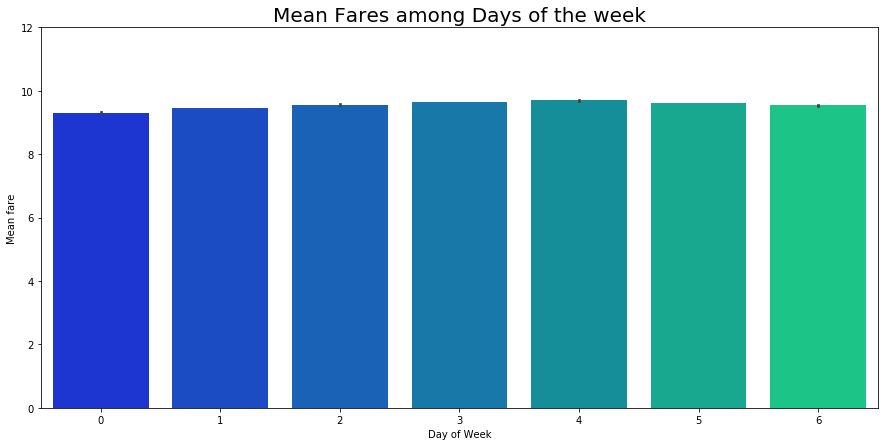

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(x='weekday', y="fare_amount", data=taxifare_cleaned, palette='winter')
plt.ylim(0,12)
plt.title("Mean Fares among Days of the week",fontsize=20)
plt.xlabel('Day of Week')
plt.ylabel('Mean fare')
plt.show()

#### From the above barchart we can say that there is no significant relation between the weekday and fare. The mean fare appears to be almost similar for all weekdays.

Text(0.5, 1, 'Heatmap of correlation between each variables')

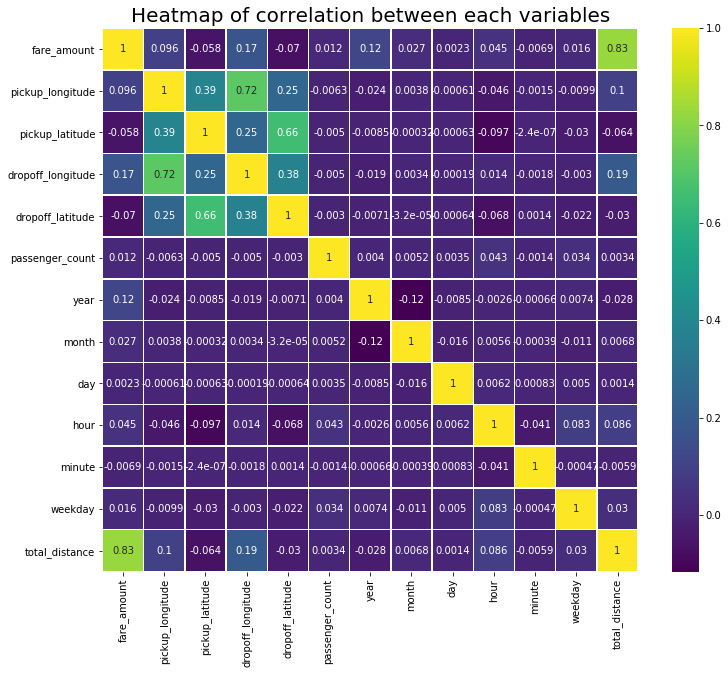

In [31]:
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(taxifare_cleaned.corr(),linewidth=0.5,annot=True,cmap='viridis')
plt.title('Heatmap of correlation between each variables',fontsize=20)

#### By analysing the above heatmap we can identify that the total distance is highly correlated with the taxi fare followed by month. 

In [32]:
taxifare_cleaned.drop(['key','pickup_datetime'],axis=1,inplace=True)
taxifare_cleaned.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,weekday,total_distance
0,7.3,-73.971863,40.760189,-73.955239,40.782976,1,2011,11,21,8,12,0,1.797494
1,6.5,-73.969345,40.749676,-73.950876,40.770764,1,2012,2,9,10,8,3,1.747274
2,6.5,-73.945297,40.775255,-73.959260,40.768440,5,2012,12,30,17,4,6,0.868605
4,9.7,-73.985811,40.717965,-73.979805,40.748685,1,2010,5,3,6,22,0,2.144219
5,6.5,-73.990437,40.755912,-73.972912,40.750320,1,2013,10,12,22,39,5,0.994622


#### Since the distance between pickup and dropoff point is calculated we can drop the coordinate variables as we no longer need them for training the model.